# Merging County Health Ranking & Income Distribution tables


### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

## Importing Data and Merging
Do work here

In [2]:
county_income = pd.read_pickle('../../data/02_intermediate/county_mobility_incomeOnly') 
county_health = pd.read_pickle('../../data/02_intermediate/county_measures')

In [46]:
county_merged.shape

(3222, 39)

In [14]:
county_income.set_index("County FIPS Code", drop=False, inplace=True)

In [17]:
county_merged = county_health.merge(county_income, how='outer', left_index=True, right_index=True)

In [21]:
# Rearranging Columns 
cols = list(county_merged.columns)

In [23]:
columns = ['County FIPS Code','County Name',
 'Commuting Zone ID','Commuting Zone Name ',
 'State','Target', 'rank_diff', 'Number of Children in Core Sample',
 'Rank-Rank Slope','Absolute Upward Mobility',
 'Top 1% Income Share','Interquartile Income Range', 'Share Between p25 and p75',
 'Mean Parent Income', 'Mean Child Income','Parent Income P25',
 'Child Income P25', 'Median Parent Income', 'Median Child Income','Parent Income P75',
 'Child Income P75', 'Parent Income P90', 'Child Income P90', 'Parent Income P99',
 'Child Income P99', 'Gini',
 'Teenage Birth Rate', 'Adult obesity','Children in poverty',
 'Daily fine particulate matter','Diabetic screening',
 'Mammography screening','Physical inactivity',
 'Premature Death','Preventable hospital stays',
 'Sexually transmitted infections', 'Unemployment',
 'Uninsured','Violent crime rate']

In [24]:
county_merged = county_merged[columns]

In [26]:
# Need to decide on features for next model

features = ['Top 1% Income Share','Interquartile Income Range', 'Share Between p25 and p75',
            'Mean Parent Income', 'Parent Income P25', 'Median Parent Income', 'Parent Income P75',
            'Parent Income P90', 'Parent Income P99',  'Teenage Birth Rate', 'Adult obesity','Children in poverty',
            'Daily fine particulate matter','Diabetic screening',
            'Mammography screening','Physical inactivity',
            'Premature Death','Preventable hospital stays',
            'Sexually transmitted infections', 'Unemployment',
            'Uninsured','Violent crime rate']

# Handling Null Values


There appear to be 81 counties for which no information exists. 
I will drop those rows, first. 

In [42]:
county_merged.head()

,County FIPS Code,County Name,Commuting Zone ID,Commuting Zone Name,State,Target,rank_diff,Number of Children in Core Sample,Rank-Rank Slope,Absolute Upward Mobility,Top 1% Income Share,Interquartile Income Range,Share Between p25 and p75,Mean Parent Income,Mean Child Income,Parent Income P25,Child Income P25,Median Parent Income,Median Child Income,Parent Income P75,Child Income P75,Parent Income P90,Child Income P90,Parent Income P99,Child Income P99,Gini,Teenage Birth Rate,Adult obesity,Children in poverty,Daily fine particulate matter,Diabetic screening,Mammography screening,Physical inactivity,Premature Death,Preventable hospital stays,Sexually transmitted infections,Unemployment,Uninsured,Violent crime rate
01001,01001,Autauga,11101,Montgomery,Alabama,0.0,13.38125,1846.0,0.44377,38.38125,0.06143,60882.38,0.51950,64000.0,45200.0,26900.0,13700.0,53900.0,31900.0,87700.0,62100.0,121600.0,90400.0,227400.0,158000.0,0.38059,0.17811,0.305000,0.159833,14.274444,0.843036,0.660176,0.317714,9014.691083,81.524265,382.48,0.052452,0.13675,285.526166
01003,01003,Baldwin,11001,Mobile,Alabama,0.0,14.64750,5061.0,0.33610,39.64750,0.12719,63853.73,0.49911,75300.0,42500.0,26600.0,13400.0,53600.0,30200.0,90500.0,59500.0,135600.0,93900.0,444500.0,194500.0,0.49101,0.16965,0.255143,0.168167,13.030000,0.807022,0.699972,0.259429,8238.328250,61.212165,269.98,0.053675,0.18000,219.144893
01005,01005,Barbour,10301,Eufaula,Alabama,0.0,11.11125,1129.0,0.39817,36.11125,0.09734,41923.99,0.40833,50000.0,32700.0,18900.0,10400.0,32000.0,22400.0,60800.0,44600.0,105600.0,75800.0,235700.0,153400.0,0.49161,0.23842,0.357571,0.334500,13.337778,0.851276,0.644598,0.347143,10094.078750,99.538616,657.64,0.081930,0.17925,161.964226
01007,01007,Bibb,10801,Tuscaloosa,Alabama,0.0,14.08400,841.0,0.43440,39.08400,0.06622,52495.53,0.46136,49600.0,38300.0,18300.0,11600.0,36500.0,26800.0,70800.0,57100.0,98300.0,89300.0,204300.0,165600.0,0.41776,0.22500,0.319000,0.250833,14.602222,0.824369,0.614891,0.345714,11553.562167,96.759406,339.28,0.065983,0.17275,221.167323
01009,01009,Blount,10700,Birmingham,Alabama,0.0,16.97575,1224.0,0.31711,41.97575,0.06281,46597.95,0.59722,57300.0,40900.0,28100.0,13900.0,50200.0,33200.0,74700.0,61300.0,101400.0,87000.0,213900.0,159800.0,0.33367,0.20429,0.299143,0.185333,14.348889,0.819018,0.651641,0.325714,8729.983917,98.327998,113.02,0.052737,0.19075,162.537352


In [50]:
county_merged.dropna(subset=['County FIPS Code']).shape

(3141, 39)

## Handling Missing Data
Summarize findings here

In [38]:
county_merged.isna().sum()

County FIPS Code                      81
County Name                           81
Commuting Zone ID                     81
Commuting Zone Name                   81
State                                 81
Target                                81
rank_diff                            453
Number of Children in Core Sample    453
Rank-Rank Slope                      453
Absolute Upward Mobility             453
Top 1% Income Share                  453
Interquartile Income Range           453
Share Between p25 and p75            453
Mean Parent Income                   453
Mean Child Income                    453
                                    ... 
Child Income P99                     453
Gini                                 453
Teenage Birth Rate                   453
Adult obesity                         81
Children in poverty                   81
Daily fine particulate matter        115
Diabetic screening                   114
Mammography screening                142
Physical inactiv

In [51]:
import missingno

### Reviewing Missing Data 

1. Make dataframe that drops all missing values
1. Make dataframe that imputes missing income data, reset Target. 

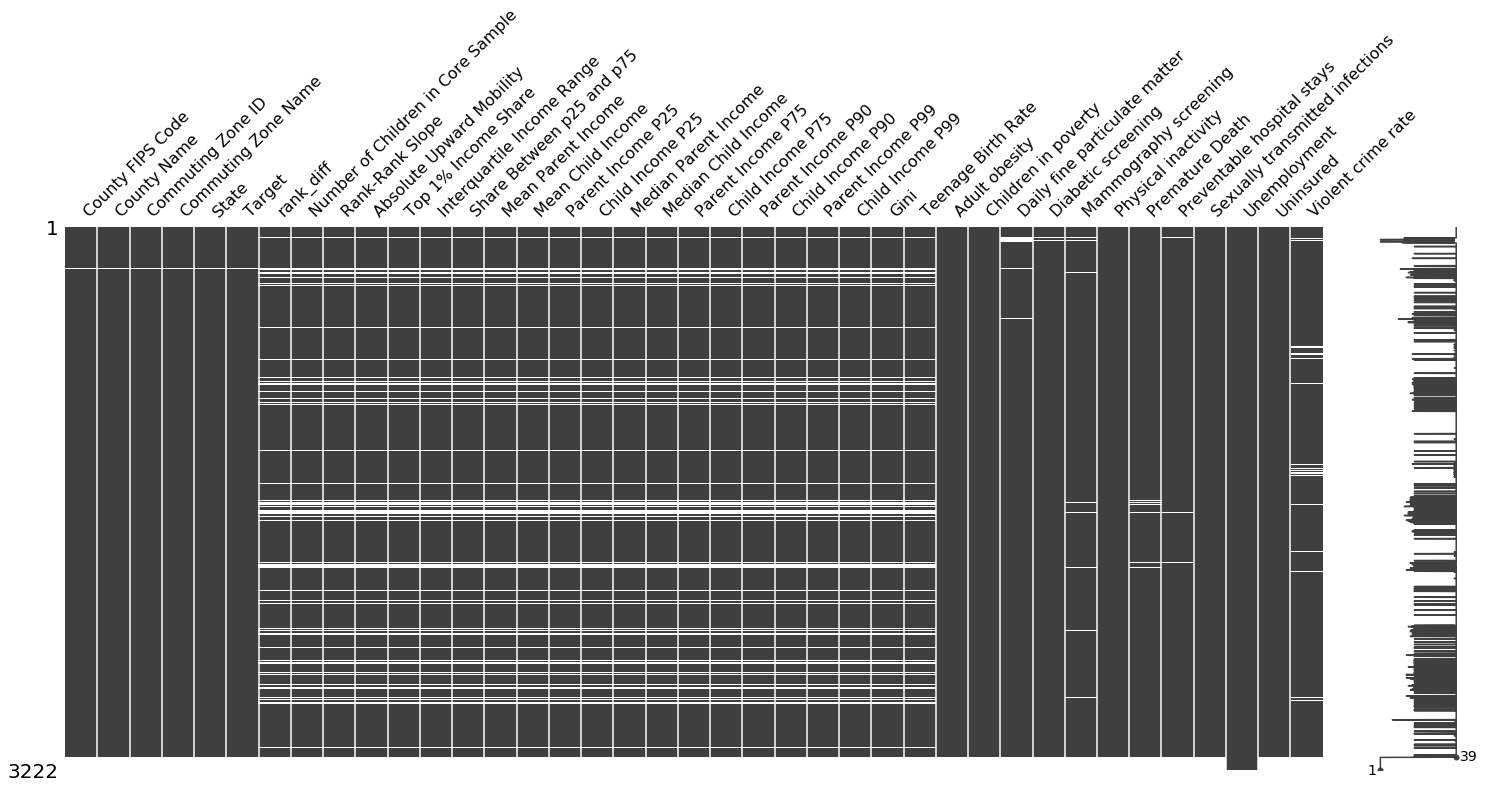

In [52]:
missingno.matrix(county_merged)

In [58]:
# Dropping all null values
merged_DropNA_all = county_merged.dropna() # Rows remaining = 2688

In [54]:
# Imputing perserves 3141 rows of data
median = dict(county_merged.describe().loc['50%',:])
county_imp_median = county_merged.fillna(value = median)


In [57]:
county_merged_imputed = county_imp_median.dropna()

#### Checking that Target is correct and there for all the rows

In [60]:
check = county_merged_imputed['Absolute Upward Mobility'] - 25


In [63]:
(county_merged_imputed['rank_diff']==check).sum()

3141

In [64]:
check2 = (county_merged_imputed.rank_diff >= 25).astype('int')

In [65]:
(county_merged_imputed['Target']==check2).sum()

3141

In [67]:
# Excellent! No more missing values and data is labeled appropriately
#county_merged_imputed.isna().sum()

## Exporting New Dataframes

In [68]:
county_merged_imputed.to_pickle('../../data/03_processed/county_merged_imputed')
merged_DropNA_all.to_pickle('../../data/03_processed/county_merged_dropped_NaNs')